# Machine Learning -- Linear Regression using Gradient Descent

## 1. *Synthetic* data generation and simple curve fitting
###### 10 + 5 + 25 = 40 marks

### &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;    a. Generate a synthetic dataset as follows.
The input values { x i } are generated uniformly in range [ 0, 1] , and the corresponding target values { y i } are obtained by first computing the corresponding values of the function __Sin(2$\pi$x)__ , and then adding a random noise with a __Gaussian distribution__ having *standard deviation* __0.3__. Generate ​ 10 such instances of
(x i , y i ) . \[You can use any standard module to generate random numbers as per a
gaussian / normal distribution, e.g., numpy.random.normal for python.\]

In [642]:
import random; # to genearte the uniform number in closed range
import math;   # to find the sin value
import numpy;  # to store the data
import pandas;
import matplotlib.pyplot as plt # for plotting
import unicodedata

In [643]:
# calling uniform but that is same as random because of the range is 0 to 1
arr = numpy.empty([0, 2]);
for i in range(10):
    x = random.uniform(0, 1);
    y = math.sin(2*math.pi*x) + numpy.random.normal(0, 0.3);
#     print("x = " + str(x) + " | y = " + str(y));
#     taking mean 0.5 in above expression to generate the noise following gaussian distribution
    arr = numpy.append(arr, [[x,y]], axis=0);
print(arr);

[[ 0.48009923  0.08659034]
 [ 0.81438966 -1.2372948 ]
 [ 0.48436237  0.00255004]
 [ 0.4681645   0.04897343]
 [ 0.6845296  -1.07356214]
 [ 0.15017776  1.05779405]
 [ 0.09545319  0.93577598]
 [ 0.08517205  0.43719508]
 [ 0.36799806  0.93812365]
 [ 0.61174703 -0.47127731]]


data has been generated successfully
Dataset is as follows : 
          X         Y
0  0.480099  0.086590
1  0.814390 -1.237295
2  0.484362  0.002550
3  0.468164  0.048973
4  0.684530 -1.073562
5  0.150178  1.057794
6  0.095453  0.935776
7  0.085172  0.437195
8  0.367998  0.938124
9  0.611747 -0.471277


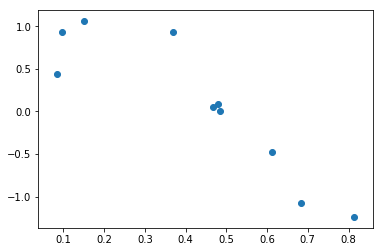

In [644]:
random_dataset = pandas.DataFrame(data=arr, columns=['X', 'Y']);
random_dataset.to_csv("random_dataset.csv", sep=",", index=False);
print("data has been generated successfully");
print("Dataset is as follows : ")
print(random_dataset);
random_dataset_plot = plt.scatter(random_dataset[:]['X'], random_dataset[:]['Y']);
# print(type(random));

Points are generated from is sin(2πx): 


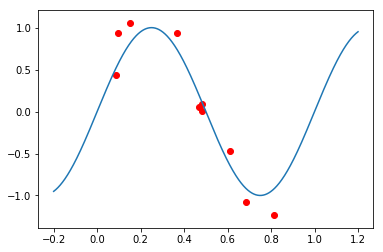

In [645]:
print("Points are generated from is sin(2" + unicodedata.lookup("GREEK SMALL LETTER PI") + "x): ");
sin_x = numpy.linspace(-0.2,1.2,1000);
sin_y = numpy.empty([0, 1]);
for i in range(1000):
    temp = math.sin(math.pi * 2 * sin_x[i]);
    sin_y = numpy.append(sin_y, [[temp]]);
# print(sin_y);
plt.plot(sin_x, sin_y);
random_dataset_plot = plt.scatter(random_dataset[:]['X'], random_dataset[:]['Y'], color='r');
plt.show();

###  &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;  b. Split the dataset into two sets randomly: 
(i) Training Set (80%) (ii) Test Set (20%).

In [646]:
# to randomise the data set and test set, appling shuffle to the array
numpy.random.shuffle(arr);
# print("SHUFFELED DATA SET IS AS FOLLOWS : ");
# print(arr);

In [647]:
# defining the training set
training_set = numpy.empty([0, 2]);
for i in range(0,8):
    training_set = numpy.append(training_set, [arr[i]], axis=0);
## converting to pandas dataframe
training_set = pandas.DataFrame(data=training_set, columns=['X', 'Y']);
print(training_set);
training_set.to_csv("training_set.csv", ",", index=False);

          X         Y
0  0.085172  0.437195
1  0.150178  1.057794
2  0.095453  0.935776
3  0.367998  0.938124
4  0.484362  0.002550
5  0.480099  0.086590
6  0.611747 -0.471277
7  0.684530 -1.073562


In [648]:
# defining the test set
test_set = numpy.empty([0, 2]);
for i in range(8, 10):
    test_set = numpy.append(test_set, [arr[i]], axis=0);
test_set = pandas.DataFrame(data=test_set, columns=['X','Y']);
print(test_set);
test_set.to_csv("test_set.csv", ",", index=False);

          X         Y
0  0.468164  0.048973
1  0.814390 -1.237295


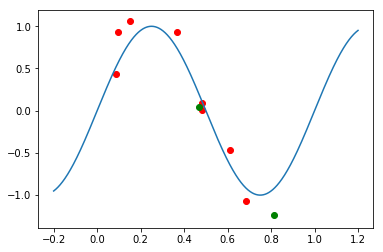

In [650]:
training_set_plot = plt.scatter(training_set[:]['X'], training_set[:]['Y'], color='r');
test_set_plot = plt.scatter(test_set[:]['X'], test_set[:]['Y'], color='g');
plt.plot(sin_x, sin_y);
plt.savefig("random_datset.jpeg");
plt.show();

### &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;C. Write a code to fit a curve that minimizes ​ squared error cost function ​ using gradient descent (with learning rate 0.05):
As discussed in class, on the training set while the model takes following form $y = W^T Φ_n (x)$ , W ∈ R n+1 ,$Φ_n (x) = [1, x, x^2 , x^3 ... , x^n ] $. Squared error is defined as $J (θ) = \frac{1}{2m}(\sum\limits_{i = 1}^{m}W^T Φ_n(x) − y_i)$. In your experiment, vary n from 1 to 9. In other words, fit 9 different curves to the training data, and hence estimate
the parameters. Use the estimated W to measure squared error on the test set, and name it as test error on test data.

In [651]:
#  define the hypothesis function
def hFunction(x, number_of_terms, coef):
    y = 0.0;
    for i in range (number_of_terms):
#         print(i);
        y += coef[i] * x**i;
    return y;
# Function is as follows :
# F(X) = coef[0] + coef[1]*X^1 + coef[2]*X^^2 + ...
# in assignment coef is reffered as weight

In [652]:
def costFunction(x, y, weightT, number_of_terms):
    return(hFunction(x, number_of_terms, weightT) - y);

def costFunctionDerivative(training_set, weightT, number_of_terms, number_of_training_samples, respect_to):
    result = 0.0;
    for i in range(number_of_training_samples):
        result += 2 * (hFunction(training_set.iloc[i]['X'], number_of_terms, weightT) - training_set.iloc[i]['Y']) * training_set.iloc[i]['X']**respect_to;
    result /= 2*number_of_training_samples;
    return result;

In [653]:
# return squared error of the training data set
def squareMeanError(training_set, number_of_terms, weightT):
    error = 0.0;
    for i in range(8):
        error += (costFunction(training_set.iloc[i]['X'], training_set.iloc[i]['Y'], weightT, number_of_terms))**2;
    error /= 2*8;
    return error;

# weightT = [1, 1];
# error = squareMeanError(training_set, 2, weightT);
# print("error = " + str(error));

In [654]:
def gradDesc(number_of_terms, training_set, number_of_training_samples, maximum_number_of_iteration):
    weight = numpy.empty([0,1]);
    old_weight = numpy.empty([0, 1]);
    # initializing the values of the pre assumed weight of the values of X
    for i in range (number_of_terms):
        weight = numpy.append(weight, [5]);
        old_weight = numpy.append(old_weight, [5]);
    old_error = 10000000;
    new_error = 0;
    i = 0;
    while(1):
        new_error = squareMeanError(training_set, number_of_terms, weight);
        if old_error - new_error < 0.00001:
            print("Error isn't decreasing more than 0.000001 in one step anymore.");
            break;
        old_error = new_error;
        i += 1;
        if i > maximum_number_of_iteration:
            print("Number of steps crossed over " + str(maximum_number_of_iteration) + ".");
            break;
        for j in range(number_of_terms):
            deriv = costFunctionDerivative(training_set, old_weight, number_of_terms, number_of_training_samples, j);
            weight[j] = old_weight[j] - 0.05 * deriv;
        for j in range(number_of_terms):
            old_weight[j] = weight[j];
#         print("i = " + str(i) + " | error = " +str(squareMeanError(training_set, number_of_terms, weight)));
    return weight;
# print(gradDesc(1, training_set, 8, 600));

for n = 1
Number of steps crossed over 1000.
values of the weights for n = 1
[ 0.99577274 -2.07425052]


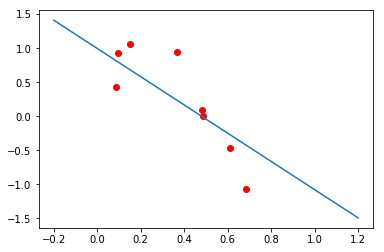

for n = 2
Number of steps crossed over 1000.
values of the weights for n = 2
[ 1.11811511 -2.17029525 -0.44794262]


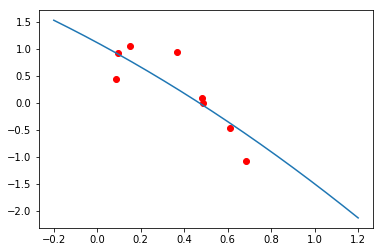

for n = 3
Number of steps crossed over 1000.
values of the weights for n = 3
[ 1.20977328 -2.50691163 -0.80746484  0.97568282]


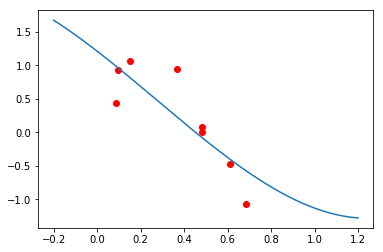

for n = 4
Number of steps crossed over 1000.
values of the weights for n = 4
[ 1.29149109 -2.80290823 -1.15861047  0.67370852  2.05272992]


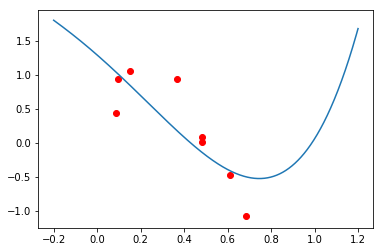

for n = 5
Number of steps crossed over 1000.
values of the weights for n = 5
[ 1.35865989 -3.02068866 -1.44410624  0.41754823  1.85080783  2.86308255]


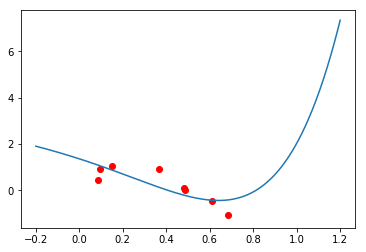

for n = 6
Number of steps crossed over 1000.
values of the weights for n = 6
[ 1.41049885 -3.17209383 -1.65990519  0.21759028  1.69037611  2.74263286
  3.47012287]


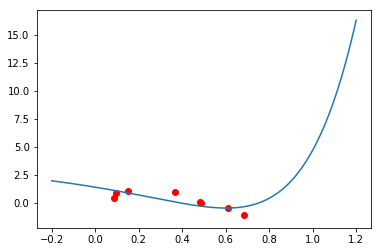

for n = 7
Number of steps crossed over 1000.
values of the weights for n = 7
[ 1.44885025 -3.2748389  -1.81668743  0.06872353  1.56932524  2.65093755
  3.40324752  3.91825344]


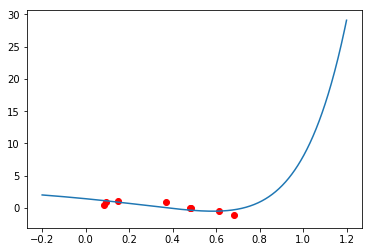

for n = 8
Number of steps crossed over 1000.
values of the weights for n = 8
[ 1.47641798 -3.34370774 -1.92779293 -0.03878886  1.48098374  2.58354462
  3.35383383  3.88285449  4.24313262]


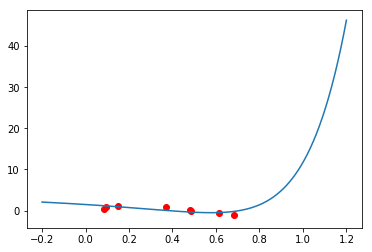

for n = 9
Number of steps crossed over 1000.
values of the weights for n = 9
[ 1.49584741 -3.3895621  -2.0052457  -0.11487202  1.41794142  2.53517298
  3.31820919  3.8572414   4.22499211  4.47476054]


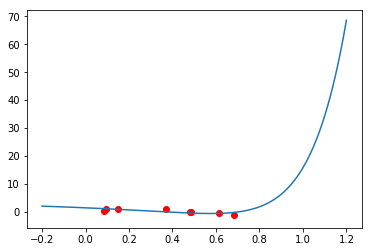

In [655]:
# calling gradiend descent optimisation fot different values of n varying from 1 to 9
# number of terms = n + 1
for i in range(2,11):
    print ("for n = " + str(i-1));
    weightT = gradDesc(i, training_set, 8, 1000);
    print("values of the weights for n = " + str(i-1));
    with open('weight_'+ str(i-1) + '.csv', mode='w') as abc:
        abc.write("n = " + str(i-1) + "\n");
        numpy.savetxt(abc, weightT, delimiter="\n");
#     numpy.savetxt(file, weightT, delimiter=',');
    print(weightT);
    values = []
    x = numpy.linspace(-0.2, 1.2, 1000);
#     print(type(x));
    for j in range(1000):
        y = hFunction(x[j], i, weightT);
#         print("X = " + str(x[j]) + " | Y = " + str(y));
        values = numpy.append(values, [y], axis=0);
    plt.plot(x,values);
    plt.scatter(training_set[:]['X'], training_set[:]['Y'], color='r');
    plt.show();

## 2. Visualization of the dataset and the fitted curves
###### [10 + 10 = 20 marks]
    (a). Draw separate plots of the synthetic data points generated in 1 (a), and all 9 different curves that you have fit for the given dataset in 1 (c).

In [656]:
import numpy;
import matplotlib.pyplot as plt;
import pandas;
import math;

In [657]:
# hypothesis function
def hFunction(x, number_of_terms, coef):
    y = 0.0;
    for i in range (number_of_terms):
#         print(i);
        y += coef[i] * x**i;
    return y;
# Function is as follows :
# F(X) = coef[0] + coef[1]*X^1 + coef[2]*X^^2 + ...
# in assignment coef is reffered as weight

In [658]:
training_set = pandas.read_csv("training_set.csv");
print("Training SET :");
print(training_set);
test_set = pandas.read_csv("test_set.csv");
print("\nTest_Set : ");
print(test_set);

Training SET :
          X         Y
0  0.085172  0.437195
1  0.150178  1.057794
2  0.095453  0.935776
3  0.367998  0.938124
4  0.484362  0.002550
5  0.480099  0.086590
6  0.611747 -0.471277
7  0.684530 -1.073562

Test_Set : 
          X         Y
0  0.468164  0.048973
1  0.814390 -1.237295


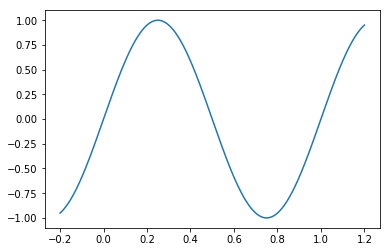

In [659]:
sin_x = numpy.linspace(-0.2,1.2,1000);
sin_y = numpy.empty([0, 1]);
for i in range(1000):
    temp = math.sin(math.pi * 2 * sin_x[i]);
    sin_y = numpy.append(sin_y, [[temp]]);
# print(sin_y);
plt.plot(sin_x, sin_y);

for n = 1
[ 0.99577274 -2.07425052]


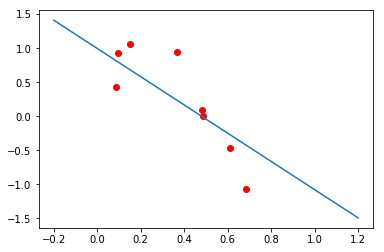

for n = 2
[ 1.11811511 -2.17029525 -0.44794262]


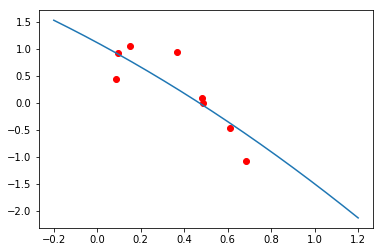

for n = 3
[ 1.20977328 -2.50691163 -0.80746484  0.97568282]


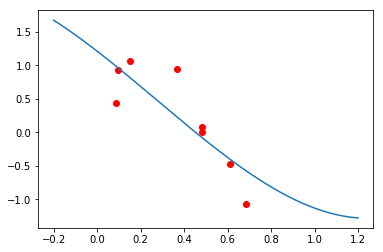

for n = 4
[ 1.29149109 -2.80290823 -1.15861047  0.67370852  2.05272992]


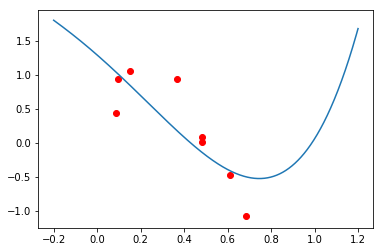

for n = 5
[ 1.35865989 -3.02068866 -1.44410624  0.41754823  1.85080783  2.86308255]


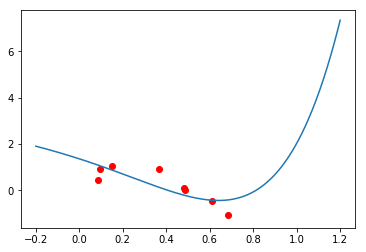

for n = 6
[ 1.41049885 -3.17209383 -1.65990519  0.21759028  1.69037611  2.74263286
  3.47012287]


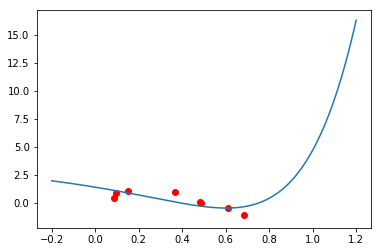

for n = 7
[ 1.44885025 -3.2748389  -1.81668743  0.06872353  1.56932524  2.65093755
  3.40324752  3.91825344]


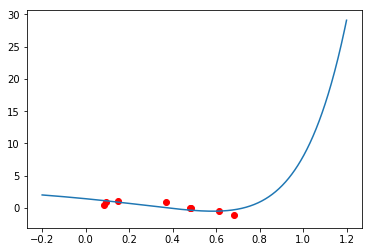

for n = 8
[ 1.47641798 -3.34370774 -1.92779293 -0.03878886  1.48098374  2.58354462
  3.35383383  3.88285449  4.24313262]


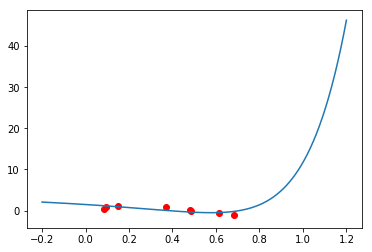

for n = 9
[ 1.49584741 -3.3895621  -2.0052457  -0.11487202  1.41794142  2.53517298
  3.31820919  3.8572414   4.22499211  4.47476054]


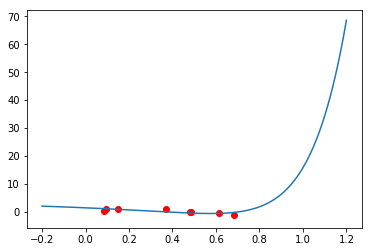

In [660]:
for i in range(2,11):
    weightT = numpy.genfromtxt("weight_"+str(i-1)+".csv", delimiter=",", skip_header=1)
    print ("for n = " + str(i-1));
    print(weightT);
    values = []
    x = numpy.linspace(-0.2, 1.2, 1000);
    for j in range(1000):
        y = hFunction(x[j], i, weightT);
#         print("X = " + str(x[j]) + " | Y = " + str(y));
        values = numpy.append(values, [y], axis=0);
    plt.plot(x,values);
#     plt.plot(sin_x, sin_y, color='g');
    plt.scatter(training_set[:]['X'], training_set[:]['Y'], color='r');
    plt.savefig("fitted_curve_" + str(i) + ".jpeg");
    plt.show();

        (b). Report squared error on both train and test data for each value of n in the form of a plot where along x-axis, vary n from 1 to 9 and along y-axis, plot both train error and test error. Explain which value of n is suitable for the synthetic dataset that you have generated and why.

In [661]:
#  define the hypothesis function
# nuber of terms = n+1
def hFunction(x, number_of_terms, coef):
    y = 0.0;
    for i in range (number_of_terms):
#         print(i);
        y += coef[i] * x**i;
    return y;
# Function is as follows :
# F(X) = coef[0] + coef[1]*X^1 + coef[2]*X^^2 + ...
# in assignment coef is reffered as weight

In [662]:
def meanSquaredError(dataset, number_of_entries, weight, n):
    sq_err = 0.0;
    for i in range(0, number_of_entries):
        sq_err += (hFunction(dataset.iloc[i]['X'], n+1, weight) - dataset.iloc[i]['Y'])**2;
    sq_err = sq_err / (2*(number_of_entries-1));
    return sq_err;

In [663]:
# updating training_set.csv adding error column
training_error_np = [];
index = []
for i in range(0,9):
    weightT = numpy.genfromtxt("weight_"+str(i+1)+".csv", delimiter=",", skip_header=1)
#     print(weightT);
    training_error = meanSquaredError(training_set, 7, weightT, i+1);
    training_error_np = numpy.append(training_error_np, training_error);
    index = numpy.append(index, i+1);
# print(training_error_np);
train_error = pandas.DataFrame(data=training_error_np, columns=['train_error']);
index = pandas.DataFrame(data=index, columns=['n']);
train_error = index.join(train_error);
# print(train_error);  
# train_error.to_csv("train_error.csv", sep=',', index=False);

In [664]:
test_error_np = [];
index = []
for i in range(0,9):
    weightT = numpy.genfromtxt("weight_"+str(i+1)+".csv", delimiter=",", skip_header=1)
#     print(weightT);
    test_error = meanSquaredError(test_set, 2, weightT, i+1);
    test_error_np = numpy.append(test_error_np, test_error);
    index = numpy.append(index, i+1);
    index = pandas.DataFrame(data=index, columns=['n']);
# print(test_error_np);
test_error = pandas.DataFrame(data=test_error_np, columns=['test_error']);
test_error = train_error.join(test_error);
# print(test_error);

     n  train_error  test_error
0  1.0     0.070774    0.148165
1  2.0     0.067055    0.043315
2  3.0     0.075698    0.082798
3  4.0     0.089927    0.289318
4  5.0     0.106056    0.798372
5  6.0     0.121519    1.696098
6  7.0     0.134844    2.972285
7  8.0     0.145513    4.538938
8  9.0     0.153624    6.273251


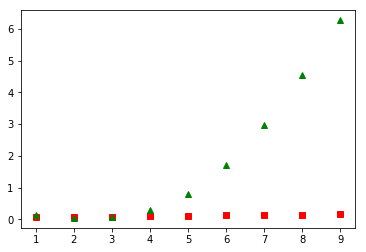

In [667]:
error_n = test_error;#training_error.join(test_error);
print(error_n);
error_n.to_csv("error_n.csv", sep=',', index=False);
train_plot = plt.plot(train_error[:]['n'], train_error[:]['train_error'], 'rs', test_error[:]['n'], test_error[:]['test_error'], 'g^');
plt.savefig("train_test_error.jpeg")

## 3. Experimenting with larger training set
###### [10 marks]
Repeat the above experiment with three other datasets having size 100, 1000 and 10,000 instances (each dataset generated similarly as described in Part 1a).
Draw the learning curve of how train and test error varies with increase in size of datasets (for 10, 100, 1000 and 10000 instances).

In [633]:
import random; # to genearte the uniform number in closed range
import math;   # to find the sin value
import numpy;  # to store the data
import pandas;
import matplotlib.pyplot as plt # for plotting
import unicodedata
best_n = 6;

In [634]:
#  define the hypothesis function
def hFunction(x, n, coef):
    y = 0.0;
    for i in range(n+1):
#         print(i);
        y += coef[i] * x**i;
    return y;

# Function is as follows :
# F(X) = coef[0] + coef[1]*X^1 + coef[2]*X^^2 + ...
# in assignment coef is reffered as weight

In [635]:
def costFunction(dataset, weightT, n, number_of_sample):
    result = 0.0;
    for i in range(number_of_sample):
        result += (hFunction(dataset.iloc[i]['X'], n, weightT) - dataset.iloc[i]['Y'])**2;
    result /= 2*number_of_sample;
    return result;

def costFunctionDerivative(dataset, weightT, n, number_of_sample, respect_to_i):
    result = 0.0;
    for i in range(number_of_sample):
        result += (hFunction(dataset.iloc[i]['X'], n, weightT) - dataset.iloc[i]['Y']) * dataset.iloc[i]['X']**respect_to_i;
    result /= number_of_sample;
    return result;

In [636]:
def meanSquareError(dataset, number_of_entries, weight, n):
    sq_err = 0.0;
    for i in range(0, number_of_entries):
        sq_err += (hFunction(dataset.iloc[i]['X'], n, weight) - dataset.iloc[i]['Y'])**2;
    sq_err = sq_err / (2*(number_of_entries-1));
    return sq_err;

In [637]:
def gradDesc(n, training_set, number_of_training_samples, maximum_number_of_iteration):
    weight = numpy.empty([0,1]);
    old_weight = numpy.empty([0, 1]);
    # initializing the values of the pre assumed weight of the values of X
    for i in range (n+1):
        weight = numpy.append(weight, [0]);
        old_weight = numpy.append(old_weight, [0]);
    old_error = 10000000;
    new_error = 0;
    i = 0;
    while(1):
        new_error = costFunction(training_set, weight, n, number_of_training_samples);
        if old_error - new_error < 0.00001:
            print("Error isn't decreasing more than 0.000001 in one step anymore.");
            break;
        old_error = new_error;
        i += 1;
        if i > maximum_number_of_iteration:
            print("Number of steps crossed over " + str(maximum_number_of_iteration) + ".");
            break;
        for j in range(n+1):
            deriv = costFunctionDerivative(training_set, old_weight, n, number_of_training_samples, j);
            weight[j] = old_weight[j] - 0.05 * deriv;
        for j in range(n+1):
            old_weight[j] = weight[j];
#         print("i = " + str(i) + " | error = " +str(squareMeanError(training_set, number_of_terms, weight)));
    return weight;
# print(gradDesc(1, training_set, 8, 600));

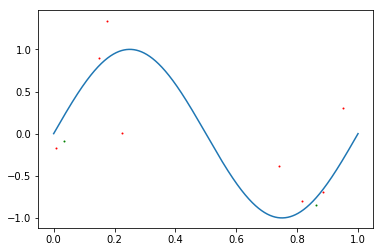

Number of steps crossed over 1000.
[ 0.56018997 -0.69273215 -0.83319603 -0.37018118  0.07678675  0.43403891
  0.70899679]


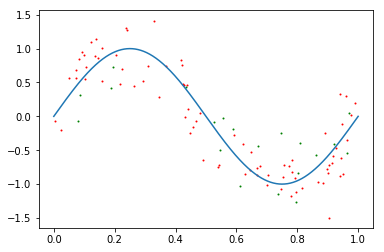

Number of steps crossed over 1000.
[ 0.84629998 -1.28597796 -1.03282947 -0.41873264  0.11187593  0.50928788
  0.79433107]


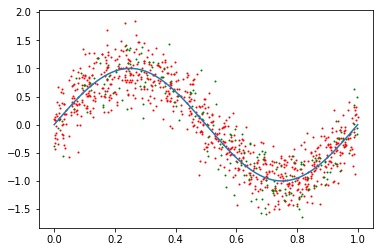

Number of steps crossed over 1000.
[ 0.77689686 -0.99882782 -1.01489053 -0.49605576  0.01443941  0.41266608
  0.70136352]


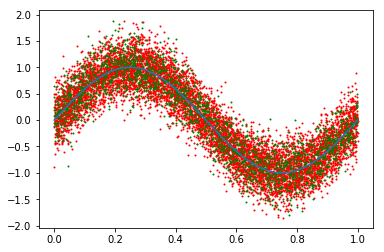

KeyboardInterrupt: 

In [640]:
number = [10, 100, 1000, 10000];
train_errors = numpy.empty([0,1]);
test_errors = numpy.empty([0,1]);
weights = numpy.empty([0,best_n+1]);
for number in [10, 100, 1000, 10000]:
    arr = numpy.empty([0,2]);
    for i in range(number):
        x = random.uniform(0, 1);
        y = math.sin(2*math.pi*x) + numpy.random.normal(0, 0.3);
        arr = numpy.append(arr, [[x,y]], axis=0);
    random_dataset = pandas.DataFrame(data=arr, columns=['X', 'Y']);
    random_dataset.to_csv("random_dataset_part3_"+str(number)+".csv", sep=",", columns=['X', 'Y']);
    
    #plotting the sin2pix curve
    x = numpy.linspace(-0.000001, 1.0000001, 100000);
    y = [];
    for i in range(100000):
        y.append(math.sin(2* math.pi * x[i]));
    plt.plot(x, y);
    
    numpy.random.shuffle(arr);
    
    training_set = numpy.empty([0,2]);
    for i in range((int)(0.8*number)):
        training_set = numpy.append(training_set, [arr[i]], axis = 0);
    training_set = pandas.DataFrame(data=training_set, columns=['X', 'Y']);
    plt.scatter(training_set[:]['X'], training_set[:]['Y'], color='r', s=1);
    training_set.to_csv("training_set_Part3_" + str(number) + ".csv", sep=",", index=False);
    
    test_set = numpy.empty([0,2]);
    for i in range((int)(0.8*number), number):
        test_set = numpy.append(test_set, [arr[i]], axis=0);
    test_set = pandas.DataFrame(data=test_set, columns=['X', 'Y']);
    plt.scatter(test_set[:]['X'], test_set[:]['Y'], color='g', s=1);
    plt.savefig("number_of_sample_" + str(number) + ".jpeg");
    test_set.to_csv("test_set_part3_" + str(number) + ".csv", sep=",", index=False);
    plt.show();
    weight = gradDesc(best_n, training_set, (int)(0.8*number), 1000);
    print(weight);
    weights = numpy.append(weights, [weight], axis=0);
    #################### got the weight ##########################
    #################### need to find the errors #################
    ##############################################################
    train_error = meanSquareError(training_set, (int)(0.8 * number), weight, best_n);
    test_error  = meanSquareError(test_set, (int)(0.2 * number), weight, best_n);
    train_errors = numpy.append(train_errors, [[train_error]], axis=0);
    test_errors = numpy.append(test_errors, [[test_error]], axis=0);
# print(train_errors);
# print(test_errors);
# print(weights);
weights = pandas.DataFrame(data=weights);
column_name = [];
for i in range(best_n+1):
        column_name.append('W'+str(i));
weights.columns = column_name;

train_errors = pandas.DataFrame(data=train_errors, columns=['train_error']);
test_errors = pandas.DataFrame(data=test_errors, columns=['test_error']);
number = pandas.DataFrame({'number_of_sample':[10, 100, 1000, 10000]});
errors = train_errors.join(test_errors);
# print(errors);
# print(number);
number = number.join(errors);
# print(number);
# print(weights);
number = number.join(weights);
# print(number);
final_result = number;
print(number);
final_result.to_csv("result_part3.csv", sep=",", index=False);
plt.plot(number.iloc[:]['number_of_sample'], number.iloc[:]['train_error'], 'rs');
plt.plot(number.iloc[:]['number_of_sample'], number.iloc[:]['test_error'], 'g^');
plt.savefig("train_test_error_large_dataset.jpeg");
plt.show();

## 4. Experimenting with cost functions
###### [20 + 10 = 30 marks]
    (a). Solve the problem by minimizing different cost functions (Do not use any regularization, Use gradient descent to minimize the cost function in each case) :
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;(i). Mean absolute error i.e.                               $J (θ) = 1/2m(\sum\limits_{i = 1}^{m}| W^T Φ n (x) − y |)$<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;(ii). Fourth power error i.e.                              $J (θ) = 1/2m(\sum\limits_{i = 1}^{m}| W^T Φ n (x) − y |^4)$<br>

    (b). Plot the test RMSE vs learning rate for each of the cost functions. Vary the learning rates as 0.025, 0.05, 0.1, 0.2 and 0.5. Which one would you prefer for this problem and why?

In [639]:
import random; # to genearte the uniform number in closed range
import math;   # to find the sin value
import numpy;  # to store the data
import pandas;
import matplotlib.pyplot as plt # for plotting
import unicodedata

In [537]:
# calling uniform but that is same as random because of the range is 0 to 1
arr = numpy.empty([0, 2]);
for i in range(50):
    x = random.uniform(0, 1);
    y = math.sin(2*math.pi*x) + numpy.random.normal(math.sin(2*math.pi*x), 0.3);
#     print("x = " + str(x) + " | y = " + str(y));
#     taking mean 0.5 in above expression to generate the noise following gaussian distribution
    arr = numpy.append(arr, [[x,y]], axis=0);

data has been generated successfully
Dataset is as follows : 
           X         Y
0   0.377646  1.574463
1   0.440632  0.331270
2   0.492480  0.178464
3   0.851414 -1.397875
4   0.892805 -1.162727
5   0.012727 -0.133480
6   0.327319  1.665815
7   0.123135  1.457388
8   0.812548 -1.510206
9   0.599559 -1.180931
10  0.195257  1.686069
11  0.351008  1.616221
12  0.453558  0.787880
13  0.511104 -0.438729
14  0.075406  1.245554
15  0.274973  2.127281
16  0.754379 -1.707844
17  0.817220 -1.929660
18  0.628111 -1.198757
19  0.969856 -0.608696
20  0.289846  2.019958
21  0.745133 -2.289913
22  0.217293  1.582642
23  0.037052  0.400111
24  0.807730 -2.191854
25  0.656864 -1.482927
26  0.483252  0.018493
27  0.565864 -0.784041
28  0.943128 -0.645068
29  0.988628 -0.068225
30  0.840258 -1.455273
31  0.660166 -1.656899
32  0.957363 -0.076322
33  0.067296  0.796263
34  0.202879  1.540972
35  0.994842 -0.022331
36  0.979318 -0.539570
37  0.800719 -1.785141
38  0.343078  1.279971
39  0.406736  1.01

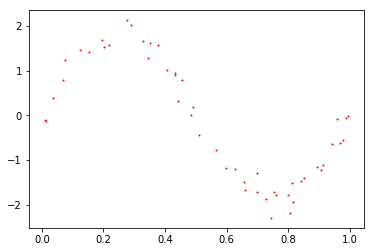

In [538]:
random_dataset = pandas.DataFrame(data=arr, columns=['X', 'Y']);
random_dataset.to_csv("random_dataset.csv", sep=",", index=False);
print("data has been generated successfully");
print("Dataset is as follows : ")
print(random_dataset);
random_dataset_plot = plt.scatter(random_dataset[:]['X'], random_dataset[:]['Y'], color='r', s=1);
# print(type(random));

Points are generated from is sin(2πx): 


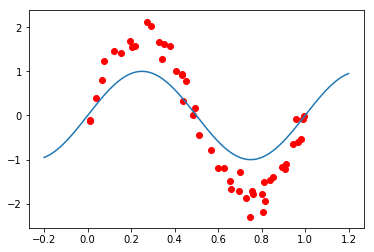

In [539]:
print("Points are generated from is sin(2" + unicodedata.lookup("GREEK SMALL LETTER PI") + "x): ");
sin_x = numpy.linspace(-0.2,1.2,1000);
sin_y = numpy.empty([0, 1]);
for i in range(1000):
    temp = math.sin(math.pi * 2 * sin_x[i]);
    sin_y = numpy.append(sin_y, [[temp]]);
# print(sin_y);
plt.plot(sin_x, sin_y);
random_dataset_plot = plt.scatter(random_dataset[:]['X'], random_dataset[:]['Y'], color='r');
plt.show();

In [540]:
numpy.random.shuffle(arr);

In [541]:
train_set = numpy.empty([0, 2]);
for i in range(0,40):
    train_set = numpy.append(train_set, [arr[i]], axis=0);
## converting to pandas dataframe
train_set = pandas.DataFrame(data=train_set, columns=['X', 'Y']);
print(train_set);
train_set.to_csv("train_set.csv", ",", index=False);

test_set = numpy.empty([0, 2]);
for i in range(40,50):
    test_set = numpy.append(test_set, [arr[i]], axis=0);
## converting to pandas dataframe
test_set = pandas.DataFrame(data=test_set, columns=['X', 'Y']);
print(test_set);
# test_set.to_csv("test_set.csv", ",", index=False);

           X         Y
0   0.969856 -0.608696
1   0.728896 -1.876822
2   0.453558  0.787880
3   0.202879  1.540972
4   0.195257  1.686069
5   0.943128 -0.645068
6   0.817220 -1.929660
7   0.656864 -1.482927
8   0.217293  1.582642
9   0.492480  0.178464
10  0.377646  1.574463
11  0.807730 -2.191854
12  0.289846  2.019958
13  0.599559 -1.180931
14  0.812548 -1.510206
15  0.754379 -1.707844
16  0.153566  1.420340
17  0.759603 -1.775995
18  0.697796 -1.720453
19  0.660166 -1.656899
20  0.012727 -0.133480
21  0.892805 -1.162727
22  0.432231  0.912316
23  0.906106 -1.212426
24  0.351008  1.616221
25  0.912069 -1.100114
26  0.851414 -1.397875
27  0.432296  0.943959
28  0.008724 -0.100244
29  0.979318 -0.539570
30  0.565864 -0.784041
31  0.994842 -0.022331
32  0.483252  0.018493
33  0.406736  1.015269
34  0.123135  1.457388
35  0.957363 -0.076322
36  0.343078  1.279971
37  0.327319  1.665815
38  0.075406  1.245554
39  0.698708 -1.280422
          X         Y
0  0.511104 -0.438729
1  0.067296  

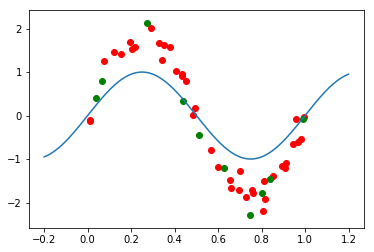

In [566]:
train_set_plot = plt.scatter(train_set[:]['X'], train_set[:]['Y'], color='r');
test_set_plot = plt.scatter(test_set[:]['X'], test_set[:]['Y'], color='g');
plt.plot(sin_x, sin_y);

In [567]:
#  define the hypothesis function
def hFunction(x, n, coef):
    y = 0.0;
    for i in range (n+1):
#         print(i);
        y += coef[i] * x**i;
    return y;
# Function is as follows :
# F(X) = coef[0] + coef[1]*X^1 + coef[2]*X^^2 + ...
# in assignment coef is reffered as weight

In [568]:
def costFunction1(training_set, weightT, n, number_of_sample):
    mean_absolute_error = 0.0;
    for i in range(number_of_sample):
        mean_absolute_error += abs(hFunction(training_set.iloc[i]['X'],n, weightT) - training_set.iloc[i]['Y']);
    mean_absolute_error /= 2*number_of_sample;
    return mean_absolute_error;

def costFunction1Derivative(training_set, weightT, n, number_of_training_samples, respect_to):
    result = 0.0;
    for i in range(number_of_training_samples):
        if (hFunction(training_set.iloc[i]['X'], n, weightT) - training_set.iloc[i]['Y']) < 0:
            result += -training_set.iloc[i]['X'];
        else :
            result += training_set.iloc[i]['X'];
    result /= 2*number_of_training_samples;
    return result;

In [586]:
def costFunction2(training_set, weightT, n, number_of_sample):
    mean_fourth_error = 0.0;
    for i in range(number_of_sample):
        mean_fourth_error = (hFunction(train_set.iloc[i]['X'], n, weightT)-training_set.iloc[i]['Y'])**4;
    mean_fourth_error /= 2*number_of_sample;
    return mean_fourth_error;

def costFunction2Derivative(training_set, weightT, n , number_of_samples, respect_to):
    result = 0.0;
    for i in range(number_of_samples):
        result += ((hFunction(training_set.iloc[i]['X'], n, weightT) - training_set.iloc[i]['Y'])**3) * training_set.iloc[respect_to]['X'];
    result /= number_of_samples/2;
    return result;

In [587]:
def gradDesc1(n, train_set, number_of_training_samples, maximum_number_of_iteration, learning_rate):
    weight = numpy.empty([0,1]);
    old_weight = numpy.empty([0, 1]);
    # initializing the values of the pre assumed weight of the values of X
    for i in range (n+1):
        weight = numpy.append(weight, [0]);
        old_weight = numpy.append(old_weight, [0]);
    old_error = 10000000;
    new_error = 0;
    i = 0;
    while(1):
#         new_error = squareMeanError(train_set, number_of_terms, weight);
        new_error = costFunction1(train_set, weight, n, number_of_training_samples);
        if old_error - new_error < 0.00001:
            print("Error isn't decreasing more than 0.000001 in one step anymore.");
            break;
        old_error = new_error;
        i += 1;
        if i > maximum_number_of_iteration:
            print("Number of steps crossed over " + str(maximum_number_of_iteration) + ".");
            break;
        for j in range(n+1):
            deriv = costFunction1Derivative(train_set, old_weight, n, number_of_training_samples, j);
            weight[j] = old_weight[j] - learning_rate * deriv;
        for j in range(n+1):
            old_weight[j] = weight[j];
#         print("i = " + str(i) + " | error = " +str(squareMeanError(training_set, number_of_terms, weight)));
    return weight;

In [588]:
def gradDesc2(n, train_set, number_of_training_samples, maximum_number_of_iteration, learning_rate):
    weight = numpy.empty([0,1]);
    old_weight = numpy.empty([0, 1]);
    # initializing the values of the pre assumed weight of the values of X
    for i in range (n+1):
        weight = numpy.append(weight, [0]);
        old_weight = numpy.append(old_weight, [0]);
    old_error = 10000000;
    new_error = 0;
    i = 0;
    while(1):
#         new_error = squareMeanError(train_set, number_of_terms, weight);
        new_error = costFunction2(train_set, weight, n, number_of_training_samples);
        if old_error - new_error < 0.00001:
            print("Error isn't decreasing more than 0.000001 in one step anymore.");
            break;
        old_error = new_error;
        i += 1;
        if i > maximum_number_of_iteration:
            print("Number of steps crossed over " + str(maximum_number_of_iteration) + ".");
            break;
        for j in range(n+1):
            deriv = costFunction2Derivative(train_set, old_weight, n, number_of_training_samples, j);
            weight[j] = old_weight[j] - learning_rate * deriv;
        for j in range(n+1):
            old_weight[j] = weight[j];
#         print("i = " + str(i) + " | error = " +str(squareMeanError(training_set, number_of_terms, weight)));
    return weight;

In [589]:
# calling gradiend descent optimisation fot different values of n varying from 1 to 9
# number of terms = n + 1
print ("for n = " + str(best_n));
weightT1 = gradDesc1(best_n, train_set, 40, 1000000, 0.05);
weightT2 = gradDesc2(best_n, train_set, 40, 1000000, 0.05);
print("values of the weights for n = " + str(best_n));
print(weightT1);
print(weightT2);
# with open('weight_'+ str(i-1) + '.csv', mode='w') as abc:
#     abc.write("n = " + str(i-1) + "\n");
#     numpy.savetxt(abc, weightT, delimiter="\n");
# numpy.savetxt(file, weightT, delimiter=',');
# print(weightT);
# values = []
# x = numpy.linspace(-0.2, 1.2, 1000);
# print(type(x));
# for j in range(1000):
#     y = hFunction(x[j], i, weightT);
#         print("X = " + str(x[j]) + " | Y = " + str(y));
#         values = numpy.append(values, [y], axis=0);
#     plt.plot(x,values);
#     plt.scatter(training_set[:]['X'], training_set[:]['Y'], color='r');
#     plt.show();

for n = 6
Error isn't decreasing more than 0.000001 in one step anymore.
Error isn't decreasing more than 0.000001 in one step anymore.
values of the weights for n = 6
[-0.13250208 -0.13250208 -0.13250208 -0.13250208 -0.13250208 -0.13250208
 -0.13250208]
[-0.04338452 -0.03260568 -0.02028898 -0.00907537 -0.00873441 -0.0421889
 -0.03655668]
